In [3]:
# Import Pandas, Import Numpy, Import Seaborn, Import Matlab, set mtplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read data
df = pd.read_csv(r'/Users/jonathanchu/Desktop/D.A.Projects/movies.csv')

In [56]:
# Lets see what we loaded in
df.head()

name  rating  genre  year  \
0                                     The Shining       6      6  1980   
1                                 The Blue Lagoon       6      1  1980   
2  Star Wars: Episode V - The Empire Strikes Back       4      0  1980   
3                                       Airplane!       4      4  1980   
4                                      Caddyshack       6      4  1980   

   released  score      votes  director  writer  star  country    budget  \
0      1304    8.4   927000.0      1795    2832   699       46  19000000   
1      1127    5.8    65000.0      1578    1158   214       47   4500000   
2      1359    8.7  1200000.0       757    1818  1157       47  18000000   
3      1127    7.7   221000.0       889    1413  1474       47   3500000   
4      1170    7.3   108000.0       719     351   271       47   6000000   

       gross  company  runtime  yearcorrect  
0   46998772     1426    146.0         1980  
1   58853106      452    104.0         1980  
2  538375067      945    124.0         1980  
3   83453539     1108     88.0         1980  
4   39846344     1083     98.0         1980

In [5]:
# I don't like how there is a ... so i'm gonna change the options
pd.set_option('display.max_rows',None)

In [7]:
# DATA CLEANING BEGINS
# 01. Check if there is any NULL

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Oh god there are some nulls. Gonna drop them

df = df.dropna()

#Sweet! those are gone. 

In [9]:
# 02. checking datatypes, and if they are optimal or not

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [11]:
# I think budget and gross should be int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# The year also is broken as it dosen't always match with 'released'. need a yearcorrect column

df['yearcorrect'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)

In [57]:
df.head()

# Sweet it's fixed

name  rating  genre  year  \
0                                     The Shining       6      6  1980   
1                                 The Blue Lagoon       6      1  1980   
2  Star Wars: Episode V - The Empire Strikes Back       4      0  1980   
3                                       Airplane!       4      4  1980   
4                                      Caddyshack       6      4  1980   

   released  score      votes  director  writer  star  country    budget  \
0      1304    8.4   927000.0      1795    2832   699       46  19000000   
1      1127    5.8    65000.0      1578    1158   214       47   4500000   
2      1359    8.7  1200000.0       757    1818  1157       47  18000000   
3      1127    7.7   221000.0       889    1413  1474       47   3500000   
4      1170    7.3   108000.0       719     351   271       47   6000000   

       gross  company  runtime  yearcorrect  
0   46998772     1426    146.0         1980  
1   58853106      452    104.0         1980  
2  538375067      945    124.0         1980  
3   83453539     1108     88.0         1980  
4   39846344     1083     98.0         1980

In [16]:
# 03. Locating and dropping any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

#shows us all the distinct values ^^ 

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [19]:
# DATA CLEANING FINISHED

In [20]:
# CORRELATION ANALYSIS BEGIN

# I want to see if there is any correlation between Budget and Gross
# Hypotheses: Higher budget = Higher Gross

<function matplotlib.pyplot.show(close=None, block=None)>

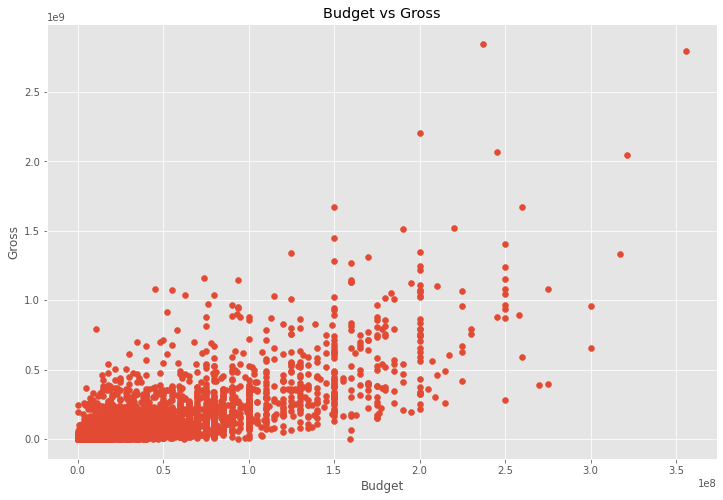

In [23]:
# Making a scatter plot to visualize using matplotlib

plt.scatter(x=df['budget'],y=df['gross'])
# make it legible with a title, and labels
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')


plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

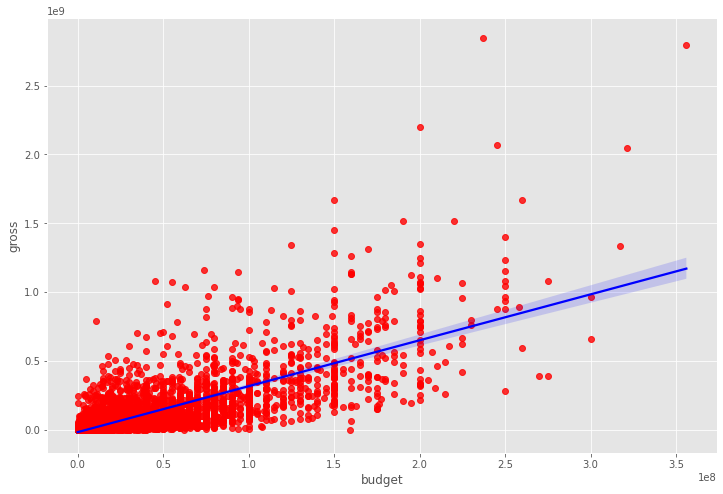

In [26]:
# Awesome..Now do the correlate? We could find out with a regression plot (seaborn)
# plot budget vs gross using seaborn 

sns.regplot(x='budget',y='gross',data=df, 
            scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [32]:
# Lets chek out correlation

df.corr(method='pearson') # pearson (default), kendall, spearman are all different ways to determine correlation.


year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

In [34]:
# Indeed a high correlation between budget & gross. 0.74

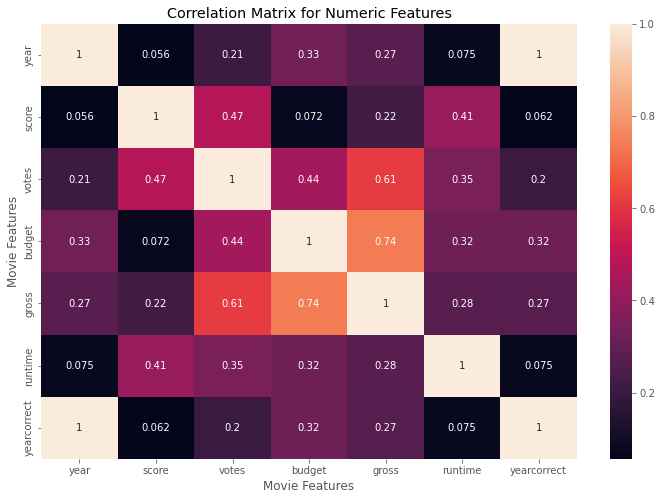

In [36]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [37]:
# NEXT CORRELATION: check out company.
# hypothesis: the company matters. there are companies that continually gross more than others

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [40]:
#kinda a save as but rename
df_numerized = df

# for every object, we categorize and we also add cat.code
for col_name in df_numerized.columns: 
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
#lets see if it worked:
df_numerized

name  rating  genre  year  \
0                                           The Shining       6      6  1980   
1                                       The Blue Lagoon       6      1  1980   
2        Star Wars: Episode V - The Empire Strikes Back       4      0  1980   
3                                             Airplane!       4      4  1980   
4                                            Caddyshack       6      4  1980   
5                                       Friday the 13th       6      9  1980   
6                                    The Blues Brothers       6      0  1980   
7                                           Raging Bull       6      3  1980   
8                                           Superman II       4      0  1980   
9                                       The Long Riders       6      3  1980   
10                                Any Which Way You Can       4      0  1980   
11                               The Gods Must Be Crazy       4      1  1980   
12                                               Popeye       4      1  1980   
13                                      Ordinary People       6      6  1980   
14                                      Dressed to Kill       6      5  1980   
15                                    Somewhere in Time       4      6  1980   
17                                               9 to 5       4      4  1980   
18                                              The Fog       6      9  1980   
20                                             Cruising       6      5  1980   
21                                        Heaven's Gate       6      1  1980   
22                                  The Final Countdown       4      0  1980   
23                                               Xanadu       4      8  1980   
28                                             Brubaker       6      5  1980   
29                                      American Gigolo       6      5  1980   
33                     Cattle Annie and Little Britches       4      6  1980   
35                                     Private Benjamin       6      4  1980   
36                                The Hollywood Knights       6      4  1980   
37                                           Motel Hell       6      4  1980   
42                                        The Stunt Man       6      0  1980   
46                                           The Island       6      0  1980   
48                                        The Nude Bomb       4      0  1980   
50                                    Stardust Memories       4      4  1980   
51                                    Melvin and Howard       6      4  1980   
53                                         Bronco Billy       4      0  1980   
56                                 When Time Ran Out...       4      0  1980   
57                                      Oh Heavenly Dog       4      4  1980   
58                                          The Octagon       6      0  1980   
75                        The Last Flight of Noah's Ark       1      1  1980   
77                                        Willie & Phil       6      4  1980   
80                                               Phobia       6      6  1980   
92        Indiana Jones and the Raiders of the Lost Ark       4      0  1981   
94                       An American Werewolf in London       6      4  1981   
95                                 Escape from New York       6      0  1981   
96                                        The Evil Dead       2      9  1981   
97                                              Porky's       6      4  1981   
98                                             Blow Out       6      5  1981   
99                                  Clash of the Titans       4      0  1981   
100                                           Excalibur       6      1  1981   
101                                           Mad Max 2       6      0  1981   
103                                             Str

In [41]:
df.head()

name  rating  genre  year  \
0                                     The Shining       6      6  1980   
1                                 The Blue Lagoon       6      1  1980   
2  Star Wars: Episode V - The Empire Strikes Back       4      0  1980   
3                                       Airplane!       4      4  1980   
4                                      Caddyshack       6      4  1980   

   released  score      votes  director  writer  star  country    budget  \
0      1304    8.4   927000.0      1795    2832   699       46  19000000   
1      1127    5.8    65000.0      1578    1158   214       47   4500000   
2      1359    8.7  1200000.0       757    1818  1157       47  18000000   
3      1127    7.7   221000.0       889    1413  1474       47   3500000   
4      1170    7.3   108000.0       719     351   271       47   6000000   

       gross  company  runtime  yearcorrect  
0   46998772     1426    146.0         1980  
1   58853106      452    104.0         1980  
2  538375067      945    124.0         1980  
3   83453539     1108     88.0         1980  
4   39846344     1083     98.0         1980

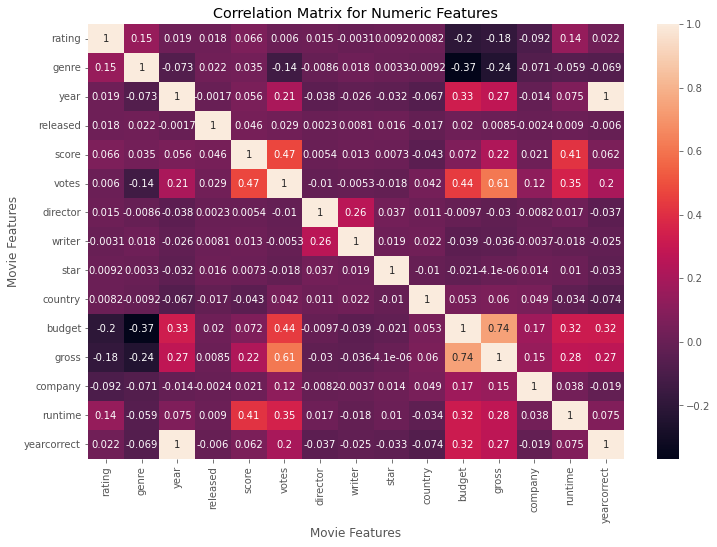

In [44]:
#mmmm we see it all now. 
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [43]:
# this is if you want to see just the numbers. no plot
df_numerized.corr()


rating     genre      year  released     score     votes  \
rating       1.000000  0.147796  0.019499  0.018083  0.065983  0.006031   
genre        0.147796  1.000000 -0.073167  0.022142  0.035106 -0.135990   
year         0.019499 -0.073167  1.000000 -0.001740  0.056386  0.206021   
released     0.018083  0.022142 -0.001740  1.000000  0.045874  0.028833   
score        0.065983  0.035106  0.056386  0.045874  1.000000  0.474256   
votes        0.006031 -0.135990  0.206021  0.028833  0.474256  1.000000   
director     0.014656 -0.008553 -0.038354  0.002308  0.005413 -0.010376   
writer      -0.003149  0.017578 -0.025908  0.008072  0.012843 -0.005316   
star         0.009196  0.003341 -0.032157  0.015706  0.007296 -0.017638   
country      0.008230 -0.009164 -0.066748 -0.017228 -0.043051  0.041551   
budget      -0.203946 -0.368523  0.327722  0.019952  0.072001  0.439675   
gross       -0.181906 -0.244101  0.274321  0.008501  0.222556  0.614751   
company     -0.092357 -0.071334 -0.014333 -0.002407  0.020656  0.118470   
runtime      0.140792 -0.059237  0.075077  0.008975  0.414068  0.352303   
yearcorrect  0.022021 -0.069147  0.998726 -0.005989  0.061923  0.203098   

             director    writer      star   country    budget     gross  \
rating       0.014656 -0.003149  0.009196  0.008230 -0.203946 -0.181906   
genre       -0.008553  0.017578  0.003341 -0.009164 -0.368523 -0.244101   
year        -0.038354 -0.025908 -0.032157 -0.066748  0.327722  0.274321   
released     0.002308  0.008072  0.015706 -0.017228  0.019952  0.008501   
score        0.005413  0.012843  0.007296 -0.043051  0.072001  0.222556   
votes       -0.010376 -0.005316 -0.017638  0.041551  0.439675  0.614751   
director     1.000000  0.261735  0.036593  0.011133 -0.009662 -0.029560   
writer       0.261735  1.000000  0.018520  0.022488 -0.039466 -0.035885   
star         0.036593  0.018520  1.000000 -0.009990 -0.021473 -0.000004   
country      0.011133  0.022488 -0.009990  1.000000  0.052977  0.060078   
budget      -0.009662 -0.039466 -0.021473  0.052977  1.000000  0.740247   
gross       -0.029560 -0.035885 -0.000004  0.060078  0.740247  1.000000   
company     -0.008223 -0.003697  0.014082  0.048569  0.170235  0.149553   
runtime      0.017433 -0.017561  0.010108 -0.034477  0.318695  0.275796   
yearcorrect -0.037371 -0.025495 -0.032687 -0.073569  0.320312  0.268721   

              company   runtime  yearcorrect  
rating      -0.092357  0.140792     0.022021  
genre       -0.071334 -0.059237    -0.069147  
year        -0.014333  0.075077     0.998726  
released    -0.002407  0.008975    -0.005989  
score        0.020656  0.414068     0.061923  
votes        0.118470  0.352303     0.203098  
director    -0.008223  0.017433    -0.037371  
writer      -0.003697 -0.017561    -0.025495  
star         0.014082  0.010108    -0.032687  
country      0.048569 -0.034477    -0.073569  
budget       0.170235  0.318695     0.320312  
gross        0.149553  0.275796     0.268721  
company      1.000000  0.037585    -0.018806  
runtime      0.037585  1.000000     0.075294  
yearcorrect -0.018806  0.075294     1.000000

In [47]:
# Another format of the same thing
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rating       rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
             yearcorrect    0.022021
genre        rating         0.147796
             genre          1.000000
             year          -0.073167
             released       0.022142
             score          0.035106
             votes         -0.135990
             director      -0.008553
             writer         0.017578
             star           0.003341
             country       -0.009164
             budget        -0.368523
             gross         -0.244101
 

In [49]:
# once again another format and it's sorted too!
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
company      genre         -0.071334
genre        company       -0.071334
             yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
budget       writer        -0.039466
w

In [54]:
# now we can see which are HIGHLY CORRELATED
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [55]:
# cool! votes and budget have the highest correlation to gross earnings. 

# compnay has low correlation :0 